# AST 4930 Homework Assignment #3 (10 pts)

## All work is due Tuesday September 26 at 5 pm.

## Instruction: 
Do all homework in this Jupyter notebook and submit your final .ipynb file via Canvas. Show ALL your work and try to add comment lines as needed to describe what your code does. 

You are encouraged to discuss homework problems with your classmates. However, your python script and answers to the questions must be written by yourself.

It's fine if you use someone else's code you found on Internet, but make sure you write down the source. You don't have to cite me when you use anything from AST4930 Notebook.

It's a common sense but just to make sure, when you make a figure make sure they are readable/understandable. If you cannot see the title, labels, data points, or if you don't understand the point of the figure, I won't probably be able to see/understand them either.


## 1. Curse of dimensionality (4 pts)

We learned that kNN suffers from the curse of dimensionality. In class, we estimated the size of a hypercube that includes $k$ nearest neighbors as a function of dimension and number of data points. In this homework, let's look into this problem in a more quantitative way by following the steps below. 

(a) Make six $D$-dimensional numpy arrays, where we adopt $D = 1, 2, 5, 10, 100,$ and $1000$, each of which contains $n=10^4$ data points that are randomly distributed in the $D$-dimensional space (hint: use np.random.rand). Let's assume that the side of each hypercube ranges from 0 to 1, so the volume of hypercubes is 1. (1 pt)


In [83]:
import numpy as np
import matplotlib.pyplot as plt
 
n = 10000
arr1d = np.random.rand(n,1)

In [84]:
arr1d

array([[0.96799954],
       [0.08978459],
       [0.62349933],
       ...,
       [0.22297724],
       [0.93443333],
       [0.50406387]])

In [85]:
arr1d.shape

(10000, 1)

In [86]:
arr2d = np.random.rand(n,2)
arr5d = np.random.rand(n,5)
arr10d = np.random.rand(n,10)
arr100d = np.random.rand(n,100)
arr1000d = np.random.rand(n,1000)




(b) For each array, compute the distance between each data points. Since you have $10^4$ data points in each array, you need to compute distance total $(10,000 \times 9,999)/2 = 49,995,000$ times. You could use a for loop, but it will be very slow. Instead, I found ``distance_matrix`` from ``scipy.spatial`` does a decent job. Once you computed all the distance, normalize them by the maximum possible distance in each hypercube, that is $\sqrt{D}$. (1 pt)


In [97]:
from scipy.spatial import distance_matrix

#dimensions = (1,2,5,10,100,1000)


dist1 = distance_matrix(arr1d, arr1d)
dist1 = dist1 /np.sqrt(1)

dist2 = distance_matrix(arr2d, arr2d)
dist2 = dist2 /np.sqrt(2)

dist5 = distance_matrix(arr5d, arr5d)
dist5 = dist5 / np.sqrt(5)

dist10 = distance_matrix(arr10d, arr10d)
dist10 = dist10 /np.sqrt(10)

dist100 = distance_matrix(arr100d, arr100d)
dist100 = dist100 / np.sqrt(100)

dist1000 = distance_matrix(arr1000d, arr1000d)
dist1000 = dist1000 / np.sqrt(1000)








(c) In a single figure, plot histograms showing the number of counts on the y axis vs. normalized distance between data points on the x axis. You have six arrays, so you will have to over-plot six histograms. Label them properly so that readers can understand what the figure shows. (1 pt)


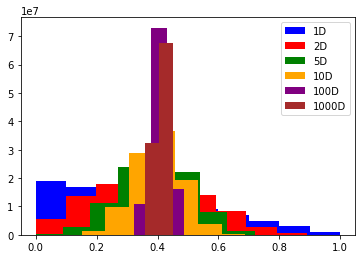

In [98]:

plt.hist(dist1.flatten(), color='blue', label = "1D")
plt.hist(dist2.flatten(), color='red',label = "2D")
plt.hist(dist5.flatten(), color='green',label = "5D")
plt.hist(dist10.flatten(), color='orange',label = "10D")
plt.hist(dist100.flatten(),  color='purple',label = "100D")
plt.hist(dist1000.flatten(), color='brown',label = "1000D")

plt.legend()



In [ ]:

plt.hist(dist1.ravel(), color='blue', label = "1D")
plt.hist(dist2.ravel(), color='red',label = "2D")
plt.hist(dist5.ravel(), color='green',label = "5D")
plt.hist(dist10.ravel(), color='orange',label = "10D")
plt.hist(dist100.ravel(),  color='purple',label = "100D")
plt.hist(dist1000.ravel(), color='brown',label = "1000D")

plt.legend()

(d) Discuss what you see in the figure you made in the context of kNN. (1 pt)


**"As the dimensions increase, the spread of datapoints becomes wider and wider. This shows the curse of dimensionality because with more dimensions, more more computational power is required."**








## 2. Classifying objects in SDSS data using kNN and decision tree (6 pts)

SDSS.csv file contains various information on 150,000 stars, galaxies, and quasars, including ugriz magnitudes and redshift. Let's build kNN and DT models based on this dataset. You may want to use pandas to read in the data (https://pandas.pydata.org/).

(a) Using the provided ugriz magnitudes, compute and store u-g, g-r, r-i, i-z colors for each object. (1 pt)

In [22]:
import pandas as pd 

data = pd.read_csv('SDSS.csv')

In [23]:
data

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237655107828973746,138.937318,49.779249,17.32152,16.28594,15.88471,15.66384,15.46604,2243,301,3,152,862475375345690624,GALAXY,0.028514,766,52247,131
1,1237678584114511952,31.594644,22.451246,18.13019,17.47997,16.97868,16.75768,16.83714,7709,301,3,65,2303710287351539712,QSO,1.694959,2046,53327,433
2,1237680298881122360,333.991221,19.977552,18.94798,18.80473,18.75522,18.72968,18.66552,8108,301,5,79,8532228490187264000,QSO,2.046520,7578,56956,578
3,1237650761319514319,186.201096,-2.808180,19.22969,18.04638,17.37830,16.99285,16.76479,1231,301,3,113,376103378880587776,GALAXY,0.000000,334,51993,192
4,1237648722280317126,124.814240,0.651496,18.76061,17.28682,16.74055,16.55152,16.45902,756,301,5,60,2316149895234349056,STAR,0.000196,2057,53816,632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1237673758185554973,100.889697,29.106283,19.17071,18.21106,17.80099,17.63203,17.53079,6585,301,6,121,3013004977846118400,STAR,0.000160,2676,54179,352
149996,1237671262268752282,124.964450,9.635759,19.38253,17.49415,16.55436,16.13420,15.80408,6004,301,5,61,2728125362876737536,GALAXY,0.110984,2423,54149,254
149997,1237673756573762584,98.821075,26.946457,18.90948,17.73591,17.31252,17.16612,17.07103,6585,301,3,103,3035579600630474752,STAR,0.000097,2696,54167,558
149998,1237678877782966354,320.766012,9.993010,17.63177,16.10855,15.35884,15.21912,15.11279,7777,301,6,66,821986413082863616,STAR,-0.000218,730,52466,289


In [54]:
u = data['u']
g = data['g']
r = data['r']
i = data['i']
data['ug'] = data['u'] - data['g']
data['gr'] = data['g'] - data['r']
data['ri'] = data['r'] - data['i']
data['iz'] = data['i'] - data['z']
redshift = data['redshift']


In [55]:
data['class']

0         GALAXY
1            QSO
2            QSO
3         GALAXY
4           STAR
           ...  
149995      STAR
149996    GALAXY
149997      STAR
149998      STAR
149999    GALAXY
Name: class, Length: 150000, dtype: object

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset or replace this with your data loading code
# X should be your feature matrix, and y should be your target labels
# Replace the following lines with your data loading code
X = data[['ug', 'gr', 'ri', 'iz', 'redshift', 'u', 'g', 'r', 'i']]
y = data['class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize lists to store training and test accuracies
train_accuracy = []
test_accuracy = []

# Vary k from 1 to 30
k_values = range(1, 31)

for k in k_values:
    # Create a kNN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model on the training data
    knn.fit(X_train, y_train)
    
    # Predict on the training and test data
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    # Calculate and store the training and test accuracies
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Plot training and test accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracy, label='Training Accuracy')
plt.plot(k_values, test_accuracy, label='Test Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy vs. k for k-Nearest Neighbors')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

# Find the optimal k that results in the highest test accuracy
optimal_k = k_values[np.argmax(test_accuracy)]
print(f'The optimal k for highest test accuracy is: {optimal_k}')




KeyboardInterrupt



(b) Make a kNN model. Vary $k$ from 1 to 30 and make a figure showing training/test accuracy vs. $k$. What is the optimal $k$ that results in the highest test accuracy? (1 pt)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset or replace this with your data loading code
# X should be your feature matrix, and y should be your target labels
# Replace the following lines with your data loading code
X = data[['ug', 'gr', 'ri', 'iz', 'redshift', 'u', 'g', 'r', 'i']]
y = data['class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize lists to store training and test accuracies
train_accuracy = []
test_accuracy = []

# Vary max_depth from 1 to 30
max_depth_values = range(1, 31)

for max_depth in max_depth_values:
    # Create a Decision Tree classifier with max_depth
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    
    # Fit the model on the training data
    dt.fit(X_train, y_train)
    
    # Predict on the training and test data
    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)
    
    # Calculate and store the training and test accuracies
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Plot training and test accuracy vs. max_depth
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_accuracy, label='Training Accuracy')
plt.plot(max_depth_values, test_accuracy, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy vs. Max Depth for Decision Tree')
plt.xticks(max_depth_values)
plt.legend()
plt.grid(True)
plt.show()

# Find the optimal max_depth that results in the highest test accuracy
optimal_max_depth = max_depth_values[np.argmax(test_accuracy)]
print(f'The optimal max_depth for highest test accuracy is: {optimal_max_depth}')



(c) Make a DT model. Vary max_depth from 1 to 30 and make a figure showing training/test accuracy vs. max_depth. What is the optimal max_depth that results in the highest test accuracy? (1 pt)

In [73]:
feature_names = ['ug', 'gr', 'ri', 'iz', 'redshift', 'u', 'g', 'r', 'i']  
feature_importances = dt.feature_importances_

feature_tuples = list(zip(feature_names, feature_importances))

print("largest numbers more important:")

for feature_tuple in feature_tuples:
    print(feature_tuple)
print("redshift and u-g are most important")

largest numbers more important:
('ug', 0.4403076518773627)
('gr', 0.008429583336188106)
('ri', 0.008819737941081082)
('iz', 0.007844625852335042)
('redshift', 0.5262312865084979)
('u', 0.0027540724601158918)
('g', 0.0014434116401951095)
('r', 0.002034903421730968)
('i', 0.002134726962493095)
redshift and u-g are most important


(d) For your best decision tree model, which features are the most important? (1 pt)

In [82]:
#load new dataset
eval_data = pd.read_csv('SDSS_evaluation.csv')

#prepare features of eval data
eval_data['ug'] = eval_data['u'] - eval_data['g']
eval_data['gr'] = eval_data['g'] - eval_data['r']
eval_data['ri'] = eval_data['r'] - eval_data['i']
eval_data['iz'] = eval_data['i'] - eval_data['z']

#label x and y with new eval data
X_eval = eval_data[['ug', 'gr', 'ri', 'iz', 'redshift', 'u', 'g', 'r', 'i']]
y_eval = eval_data['class']

#best kNN model
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model.fit(X_train, y_train)
knn_accuracy = knn_model.score(X_eval, y_eval)

#best decision tree model
DT_model = DecisionTreeClassifier(max_depth=optimal_max_depth, random_state=0)
DT_model.fit(X_train, y_train)
DT_accuracy = DT_model.score(X_eval, y_eval)

print("Accuracy of kNN model w/ eval data:", knn_accuracy)
print("Accuracy of DT model w/ eval data:", DT_accuracy)



Accuracy of kNN model w/ eval data: 0.5650866666666666
Accuracy of DT model w/ eval data: 0.6672933333333333


(e) SDSS_evaluation.csv file contains another 150,000 stars, galaxies, and quasars. Using the best kNN and decision tree models you obtained, make predictions for this new dataset and compute the accuracy. (1 pt)

In [93]:
print("\nClass Counts in data:")
print(data['class'].value_counts())

print("Class Counts in eval_data:")
print(eval_data['class'].value_counts())





Class Counts in data:
GALAXY    50000
QSO       50000
STAR      50000
Name: class, dtype: int64
Class Counts in eval_data:
GALAXY    86323
STAR      33085
QSO       30592
Name: class, dtype: int64


(f) You should have gotten poor performance from your kNN and decision tree models unless you did some magic. Have a look at the your training/evaluation datasets and discuss what might have caused poor performace. (1 pt)

**The poor performance is probably due to poor training data, in that the training data is not representative of the evaluation data. There is an even split of each in the original data, but in the eval data there are way more galaxies than stars and QSOs.**